<a href="https://colab.research.google.com/github/JunhaumHayden/PythonCodes/blob/main/Redu%C3%A7%C3%A3oDimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Implemente um programa em Python que realize as seguintes transformações em uma imagem colorida que encontra-se em: /content/drive/MyDrive/ColabNotebooks/ml/lenna.jpg

1 - Converter a imagem para níveis de cinza (valores de 0 a 255).
2 - Converter a imagem para binária (preto e branco, com valores de 0 e 255).

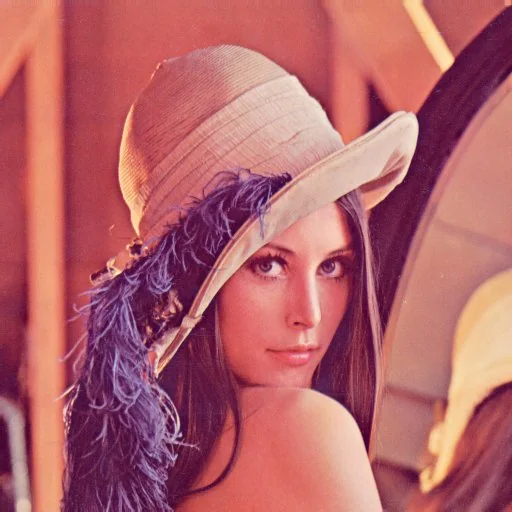

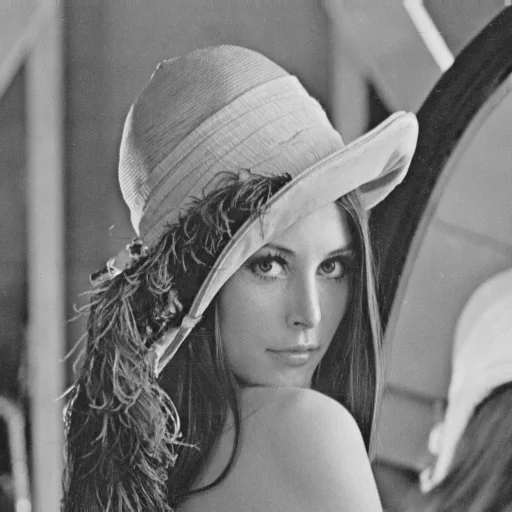

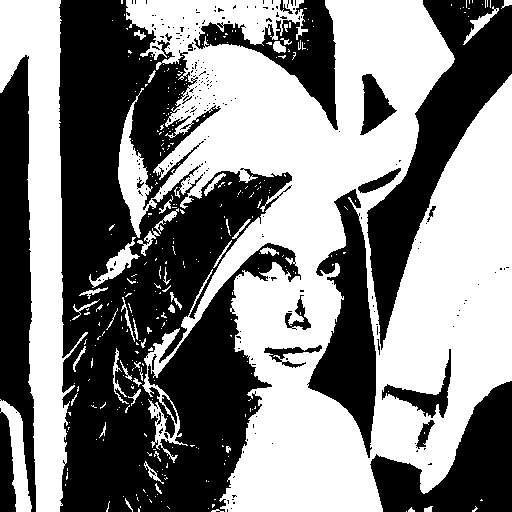

In [2]:
# Com utilizaçao da biblioteca openCV
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Caminho para a imagem
image_path = '/content/drive/MyDrive/ColabNotebooks/ml/lenna.jpg'

# Carregar a imagem
img = cv2.imread(image_path)

# Verificar se a imagem foi carregada corretamente
if img is None:
    print(f"Erro: Não foi possível carregar a imagem em {image_path}")
else:
    # Converter para níveis de cinza
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Converter para binária (usando um threshold simples)
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)


    # Exibir as imagens (opcional, com cv2_imshow do Colab)
    cv2_imshow(img)
    cv2_imshow(gray_image)
    cv2_imshow(binary_image)

    # Salvar as imagens (opcional)
    #cv2.imwrite('gray_image.jpg', gray_image)
    #cv2.imwrite('binary_image.jpg', binary_image)

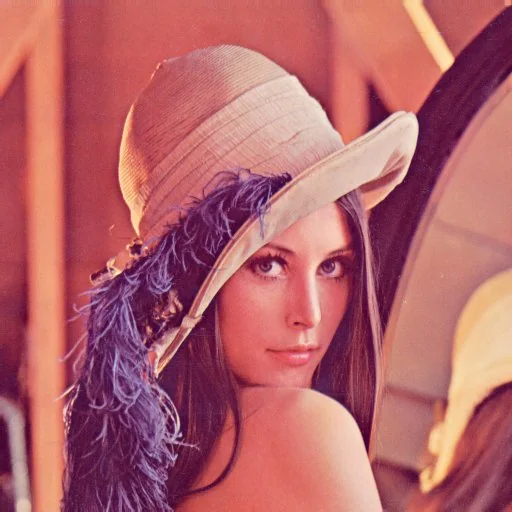

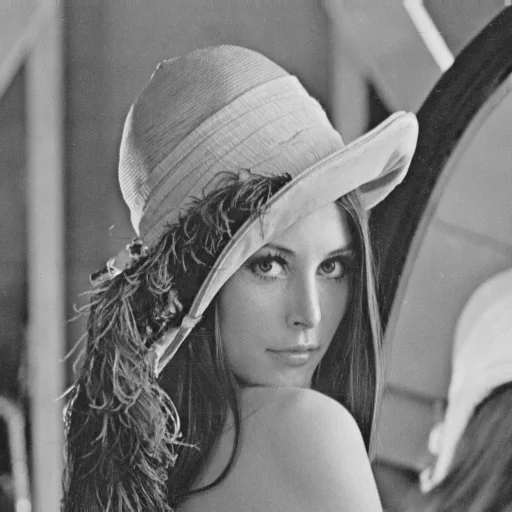

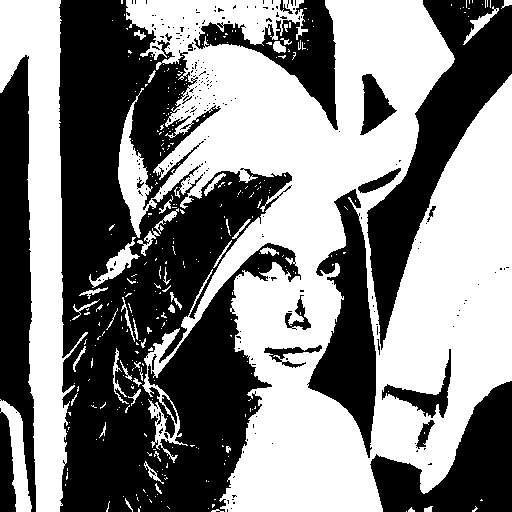

In [7]:
# Utilizando uma funçao para converter os pixel em escala de cinza e binário
from google.colab import drive
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image


# Caminho para a imagem
image_path = '/content/drive/MyDrive/ColabNotebooks/ml/lenna.jpg'

# Abrir a imagem usando a biblioteca Pillow (PIL)
try:
    img = Image.open(image_path)
    # Converter a imagem para o modo RGB (se necessário)
    img = img.convert("RGB")

    # Converter para níveis de cinza sem usar bibliotecas de processamento de imagens
    width, height = img.size
    gray_img_data = []
    for y in range(height):
      row = []
      for x in range(width):
        r, g, b = img.getpixel((x, y))
        gray = int(0.2989 * r + 0.5870 * g + 0.1140 * b)
        row.append(gray)
      gray_img_data.append(row)

    gray_img = Image.new('L', (width, height))
    gray_img.putdata([pixel for row in gray_img_data for pixel in row])


    # Converter para binária (preto e branco, com valores 0 e 255)
    threshold = 127  # Define o limiar para a binarização
    binary_img_data = []
    for y in range(height):
      row = []
      for x in range(width):
        gray = gray_img.getpixel((x, y))
        binary = 255 if gray > threshold else 0
        row.append(binary)
      binary_img_data.append(row)

    binary_img = Image.new('L', (width, height))
    binary_img.putdata([pixel for row in binary_img_data for pixel in row])


    # Salvar ou exibir as imagens (opcional, requer a instalação da biblioteca Pillow)
    gray_img.save("gray_image.jpg")
    binary_img.save("binary_image.jpg")


    # Exibindo as imagens (precisa do display do ambiente)
    gray_img.show()
    binary_img.show()
    # Exibições com img.show() não funcionarão no Google Colab.
    # Pode-se salvar as imagens e visualizá-las no
    # navegador de arquivos do Colab ou fazer o download.
    # ou:
    # Carregar a imagem usando OpenCV
    img = cv2.imread(image_path)

    # Verificar se a imagem foi carregada corretamente
    if img is None:
        print(f"Erro: Não foi possível carregar a imagem em {image_path}")
    else:

        # Exibir as imagens usando cv2_imshow
        cv2_imshow(img)
        cv2_imshow(gray_image)
        cv2_imshow(binary_image)

except FileNotFoundError:
    print(f"Erro: O arquivo de imagem não foi encontrado em {image_path}")
except Exception as e:
    print(f"Ocorreu um erro: {e}")